# CIFAR-10 Multiple Classes

Let's go over another example of using keras and building out CNNs.
The CIFAR-10 datasets which consists of 10 different image types

In [30]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [3]:
from tensorflow.keras.datasets import cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
170500096/170498071 [==============================] - 144s 1us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
import matplotlib.pyplot as plt

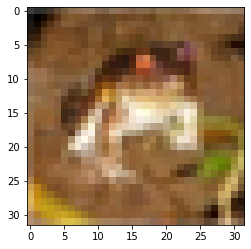

In [7]:
# Frog
plt.imshow(x_train[0])

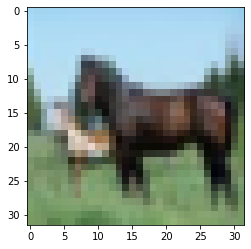

In [9]:
# Horse
plt.imshow(x_train[12])

## Preprocessing

In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
x_train.min()

0

In [12]:
x_train.max()

255

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train.shape

(50000, 1)

In [18]:
y_train[0]

array([6], dtype=uint8)

In [19]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [20]:
y_cat_train.shape

(50000, 10)

In [21]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Building the Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

## First Set of Layers

# Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

## Second Set of Layers

# Convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten Images from 32by32 to 1024
model.add(Flatten())

# 256 Neurons in dense hidden layer
model.add(Dense(256, activation='relu'))

# Last Layer is the classifier, 10 classes
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [29]:
model.fit(x_train,y_cat_train,
         epochs=15,
         validation_data=(x_test,y_cat_test),
         callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 57s 36ms/step - loss: 1.7339 - accuracy: 0.3683 - val_loss: 1.2773 - val_accuracy: 0.5513
Epoch 2/15
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1782 - accuracy: 0.5857 - val_loss: 1.1279 - val_accuracy: 0.6016
Epoch 3/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0127 - accuracy: 0.6490 - val_loss: 1.0732 - val_accuracy: 0.6348
Epoch 4/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8993 - accuracy: 0.6933 - val_loss: 1.1016 - val_accuracy: 0.6376
Epoch 5/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8136 - accuracy: 0.7220 - val_loss: 0.9675 - val_accuracy: 0.6795
Epoch 6/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7430 - accuracy: 0.7413 - val_loss: 1.0678 - val_accuracy: 0.6500
Epoch 7/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6851 - accuracy: 0.7671 - val_loss: 1.0543 -

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

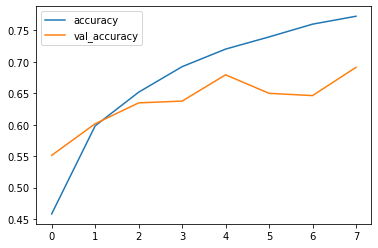

In [35]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

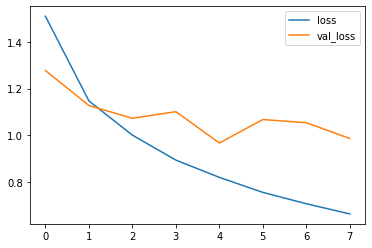

In [36]:
losses[['loss','val_loss']].plot()

In [37]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test, verbose=0))

['loss', 'accuracy']
[0.9868444204330444, 0.6913999915122986]


In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
predictions = model.predict_classes(x_test)

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1000
           1       0.84      0.78      0.81      1000
           2       0.63      0.51      0.57      1000
           3       0.61      0.34      0.44      1000
           4       0.67      0.64      0.65      1000
           5       0.52      0.71      0.60      1000
           6       0.74      0.81      0.78      1000
           7       0.74      0.74      0.74      1000
           8       0.73      0.83      0.78      1000
           9       0.74      0.81      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [42]:
confusion_matrix(y_test,predictions)

array([[732,  19,  39,   9,  13,  13,  13,  12, 101,  49],
       [ 27, 782,   4,   8,   5,  10,  13,   2,  40, 109],
       [ 68,   5, 511,  33,  86, 125,  75,  44,  37,  16],
       [ 27,  13,  73, 339,  74, 305,  75,  42,  25,  27],
       [ 34,   5,  64,  20, 639,  64,  59,  89,  22,   4],
       [ 16,   5,  45,  71,  53, 710,  23,  46,  16,  15],
       [  9,   5,  33,  37,  32,  38, 815,   7,  14,  10],
       [ 26,   5,  24,  23,  47,  85,  11, 745,   7,  27],
       [ 73,  26,   5,   9,   4,   9,   4,   3, 835,  32],
       [ 34,  65,  10,   8,   6,   8,   7,  14,  42, 806]], dtype=int64)

<AxesSubplot:>

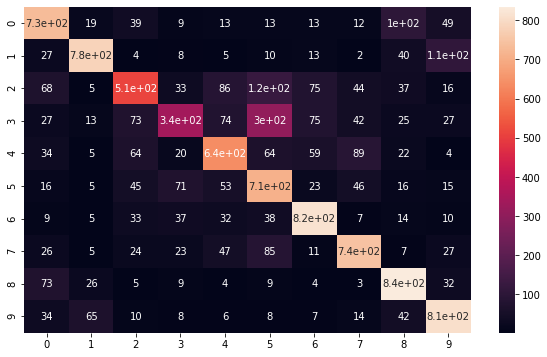

In [43]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

## Predicting a given image

In [44]:
my_image = x_test[20]

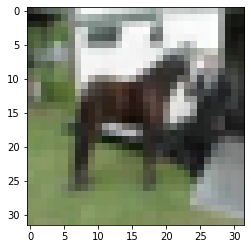

In [45]:
plt.imshow(my_image)

In [46]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([7], dtype=int64)